In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [9]:

import os
base_path='../input/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))


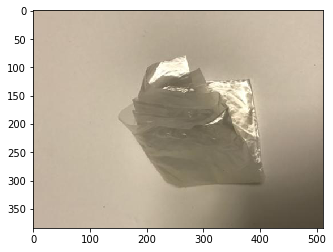

In [10]:
import matplotlib.pyplot as plt
path=plt.imread("../input/garbage classification/Garbage classification/trash/trash6.jpg")
plt.imshow(path)

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)
validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 32)        9248      
__________

In [ ]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator,steps_per_epoch=500,validation_steps=50)

Epoch 1/20
500/500 [==============================] - 175s 350ms/step - loss: 1.4863 - acc: 0.3750 - val_loss: 1.2505 - val_acc: 0.4955
Epoch 2/20
500/500 [==============================] - 173s 346ms/step - loss: 1.1824 - acc: 0.5381 - val_loss: 1.1487 - val_acc: 0.5376
Epoch 3/20
500/500 [==============================] - 173s 346ms/step - loss: 1.0241 - acc: 0.6149 - val_loss: 1.1872 - val_acc: 0.5643
Epoch 4/20
500/500 [==============================] - 173s 347ms/step - loss: 0.9102 - acc: 0.6605 - val_loss: 1.0571 - val_acc: 0.6229
Epoch 5/20
500/500 [==============================] - 173s 345ms/step - loss: 0.7813 - acc: 0.7121 - val_loss: 0.9909 - val_acc: 0.6395
Epoch 6/20
500/500 [==============================] - 171s 342ms/step - loss: 0.6987 - acc: 0.7436 - val_loss: 0.8519 - val_acc: 0.6904
Epoch 7/20
500/500 [==============================] - 171s 342ms/step - loss: 0.6311 - acc: 0.7740 - val_loss: 1.1625 - val_acc: 0.6459
Epoch 8/20
500/500 [============================